In [1]:
using DataFrames
using StatsBase
using StatsPlots
using Random
using Distributions

default(label=false);

# 10.1 Maximum entropy

Code 10.1

In [2]:
p = DataFrame(
    :A => [0, 0, 10, 0, 0],
    :B => [0, 1, 8, 1, 0],
    :C => [0, 2, 6, 2, 0],
    :D => [1, 2, 4, 2, 1],
    :E => [2, 2, 2, 2, 2],
)

,A,B,C,D,E
,Int64,Int64,Int64,Int64,Int64
1,0,0,0,1,2
2,0,1,2,2,2
3,10,8,6,4,2
4,0,1,2,2,2
5,0,0,0,1,2


Code 10.2

In [3]:
p_norm = mapcols(c -> c ./ sum(c), p)

,A,B,C,D,E
,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.1,0.2
2,0.0,0.1,0.2,0.2,0.2
3,1.0,0.8,0.6,0.4,0.2
4,0.0,0.1,0.2,0.2,0.2
5,0.0,0.0,0.0,0.1,0.2


Code 10.3

In [4]:
ent_vals = mapcols(entropy, p_norm)

,A,B,C,D,E
,Float64,Float64,Float64,Float64,Float64
1,-0.0,0.639032,0.950271,1.47081,1.60944


Code 10.4

In [5]:
ways = [1, 90, 1260, 37800, 113400]
logwayspp = log.(ways)/10

5-element Vector{Float64}:
 0.0
 0.4499809670330265
 0.7138866999945523
 1.0540064381607679
 1.163867667027579

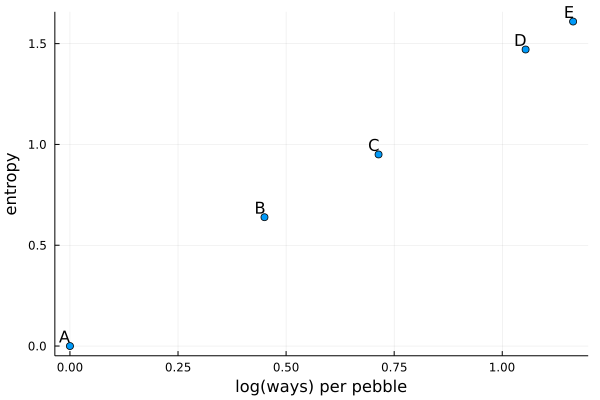

In [6]:
txt = text.(names(ent_vals), :bottom, :right, 11)
scatter(logwayspp, collect(ent_vals[1,:]), txt=txt, xlab="log(ways) per pebble", ylab="entropy")

Code 10.5

In [7]:
p = [
    [1/4, 1/4, 1/4, 1/4],
    [2/6, 1/6, 1/6, 2/6],
    [1/6, 2/6, 2/6, 1/6],
    [1/8, 4/8, 2/8, 1/8],
]

map(x -> sum(x .* [0, 1, 1, 2]), p)

4-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0

Code 10.6

Could be simplified with just `map(entropy, p)`

In [8]:
# compute entropy of each distribution
map(x -> -sum(x.*log.(x)), p)

4-element Vector{Float64}:
 1.3862943611198906
 1.3296613488547582
 1.3296613488547582
 1.2130075659799042

Code 10.7

In [9]:
p = 0.7
A = [
    (1-p)^2, p*(1-p), (1-p)*p, p^2,
]

4-element Vector{Float64}:
 0.09000000000000002
 0.21000000000000002
 0.21000000000000002
 0.48999999999999994

Code 10.8

In [10]:
-sum(A.*log.(A))

1.221728604109787

Code 10.9

In [11]:
function sim_p(G::Float64 = 1.4)
    p = rand(Uniform(), 3)
    x4 = (G * sum(p) - p[2] - p[3])/(2-G)
    push!(p, x4)
    p ./= sum(p)
    (entropy(p), p)
end

sim_p (generic function with 2 methods)

Code 10.10

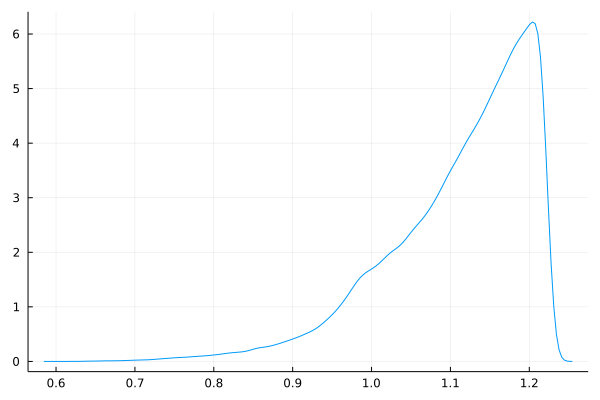

In [12]:
Random.seed!(1)
cnt = 10^5
H = [sim_p(1.4) for _ ∈ 1:cnt];
density(first.(H))

Code 10.11

In [13]:
entropies = first.(H)
distributions = last.(H);

Code 10.12

In [14]:
maximum(entropies)

1.2217282654319392

Code 10.13

In [15]:
distributions[findmax(entropies)[2]]

4-element Vector{Float64}:
 0.08983102505773202
 0.21011303987855837
 0.2102249100059776
 0.48983102505773196

# 10.2 Generalized linear models

No code here, wheee!